In [21]:
import torch
import numpy as np

#### PyTorch workflow
1. Get data ready (turn them into tensors)
2. Build or pick a pre-trained model (that suits your problem)
    - 2.1 Pick a loss function and an optimizer
    - 2.2 Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model (making predictions) (inference)
5. Improve through experimentation
6. Save and reload your trained model

In [22]:
# Explore an example of PyTorch end to end workflow
# "nn" is the abbreviation of neural network
# it contains the basic building blocks for neural networks (a computational graph)
from torch import nn
import matplotlib.pyplot as plt

In [23]:
# 1. Data (preparing and loading)
# Data can be anything from (CSVs, images, videos, text, DNA, Audio, etc.)
# Get data into numerical format -> build a model to learn patterns in that numerical representation

# lets create some known data using the linear regression formula
# we'll use the formula y = b*x + a
# where b is the slope and a is the y-intercept
# to make a straight line with "known" parameters

# create "known" parameters
weight = 0.7 # represent b in the previous formula
bias = 0.3 # represent a in the previous formula

# build a model that estimates those numbers
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # x is uppercase since it is a tensor/matrix
Y = weight * X + bias
print(X[:10])
print(len(X))
print(Y[:10])
print(len(Y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
50
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50


In [24]:
# splitting data into training and test sets (important step!)

# We'll use an 80/20 split with 80% training set and 20% testing set. (sometimes you can use  validation set)
# create a train/test split

train_split = int(0.8 * len(X)) # 40

X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [25]:
# Build a function to visualize data

def plot_predictions(train_data=X_train, train_labels = Y_train, test_data=X_test, test_labels=Y_test, predictions=None):
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") # c: color s: size label: legend

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

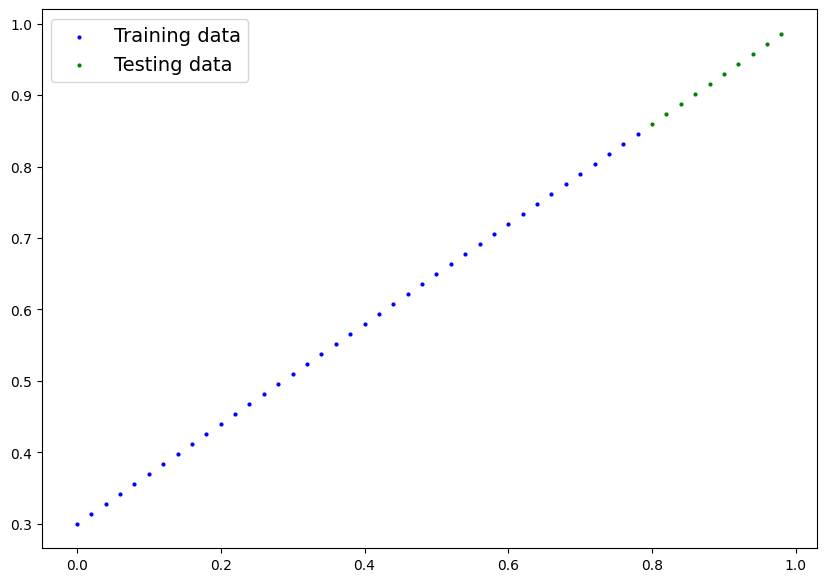

In [26]:
plot_predictions()

### nn.Parameter
- what parameters should the model try and learn. often a PyTorch layer from Torch.nn will set these for us
### nn.Module
- The base class for all neural network modules
- if you subclass it, you should override the method forward()
### torch.optim
- This is where the optimizers live in pytorch, they will help with gradient descent
### def forward()
- this method defines what happens in the forward computation

In [27]:
# create linear regression model class

# what the model will do
# start with random values (weights and bias)
# Look at training data and adjust weights and bias to better represent (or get closer to) 
# the ideal values (the weight and bias values we used to create the data)
# how does it do so ?
# through 2 main algorithms:
# 1. gradient descent (activated with "require_grad=True")
# 2. Backpropagation

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # random numbers to start with
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, # track gradients
                                                dtype=torch.float)) # float32
        # random numbers to start with
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True)) # track gradients

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = b*x + a)


In [28]:
# checking our model with .parameters() method
# create a random seed
torch.manual_seed(42)
model = LinearRegressionModel()
# List parameters
print(list(model.parameters()), "\n")
# List named parameters
print(model.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


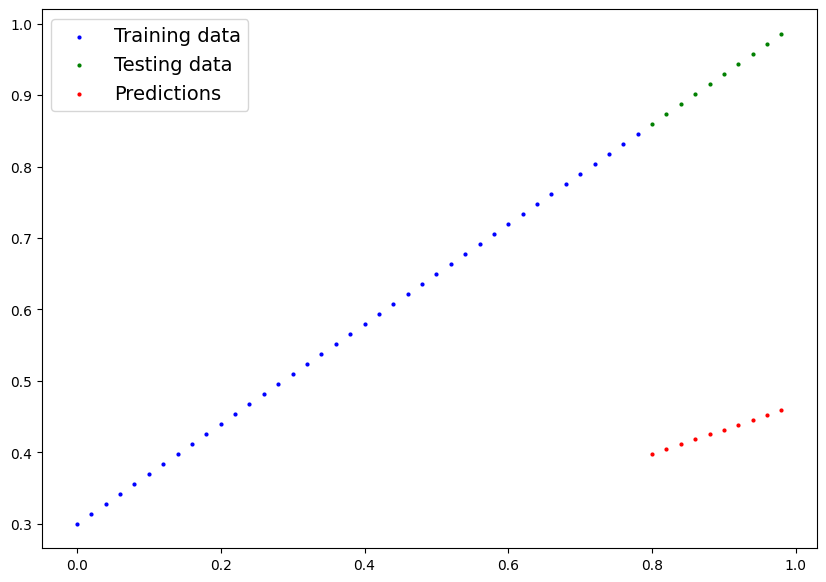

In [29]:
# Making predictions using "torch.inference_mode()"
# To check our model predictive power. we will see how well it predicts "Y_test" based on "X_test"
# when we pass data to the model. it will run it through the method forward

# y_preds = model(X_test) same as (inference_mode) except that below code is faster 
# and provides only needed data (removes grad function)

# with torch.no_grad():
#   y_preds = model(X_test)
# same as below

with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)

### 3. Train the model

The whole idea of training is to move from some **unknown** parameters (may be random) to some **known** parameters or in other words from a poor representations of the data to a better representation of the data.

### Measure models predictions from actual representation

To measure how poor or how wrong your models predictions are is to use a **loss function**

* **Note**: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

### Things we need to train

* **Loss function**: A function to measure how wrong your model predictions are to the ideal outputs, lower is better.

* **optimizer**: Takes into account the loss of a model and adjusts the model's parameters (ex: weights and bias) to improve the loss function.

And specifically for PyTorch, we need:
- a training loop
- a testing loop

### Ways to calculate the loss
- Mean absolute error (in pytorch: L1Loss)
- Mean squared error (in pytorch: MSError)
- ...

### Optimizers

- you can find optimizers in "torch.optim"
    - optim is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough that you can implement your own optimizers.

- example algorithms:
    - Adam
    - SGD (stochastic gradient descent)
    - ...

In [30]:
# setup a loss function (Mean absolute error)
loss_fn = nn.L1Loss()

# setup an optimizer (Stochastic Gradient Descent)
# lr is the most important hyperparameter here, it defines how big/small the optimizer changes the parameters 
# wih each step (a small lr results in small changes, a large lr results in large changes)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) # learning rate = 0.01
# learning rate value comes with experience and can be adjusted

### Which loss function and optimizer to use
- This will be problem specific. But with experience, you'll get an idea of what works best for your problem set.
    - for example: for a regression problem (like ours now), a loss function of **nn.L1Loss()** and an optimizer of **nn.optim.SGD()** will suffice.
    - But, for a classification problem like classifying whether a photo is a dog or a cat, a loss function of **nn.BCEWithLogitsLoss()** (binary cross entropy) and an optimizer of **nn.optim.Adam()** will be better.

# Building a training loop (and a testing loop) in PyTorch
- a couple of things we need to a training loop:
1. loop through he data
2. Forward pass (or forward propagation) to make predictions on data (this involves data moving through our model's `forward()` functions)
    - data moving from input layer through the model (neural network) to output layer
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward (or backpropagation) - move backwards through the network (from output layer to input layer) to calculate gradients for each parameter of our model with respect to the loss
6. Optimizer step - use the optimizer (ex: gradient descent) to update the parameters of our model to minimize the loss (lower the loss, better the model)

### Gradient (rate of change)

- denotes the direction of greatest change of a function.
- A steep slope, hill, etc. goes up or down very quickly.

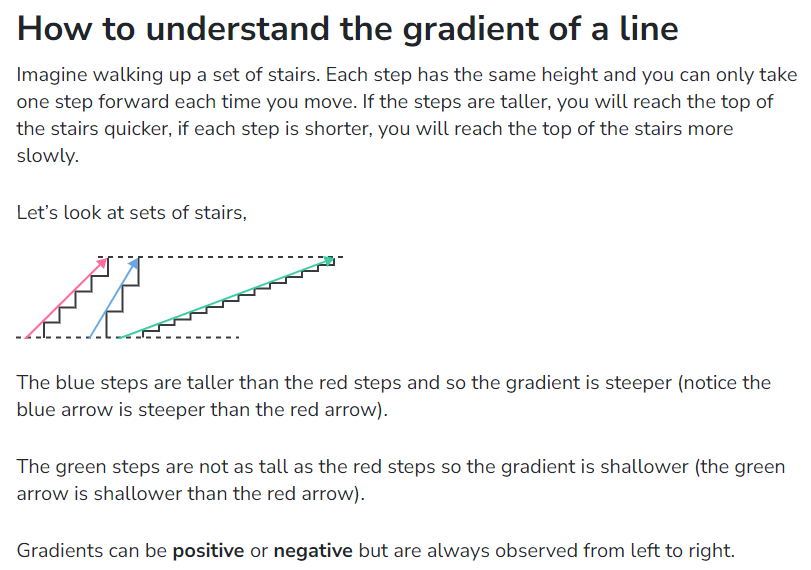
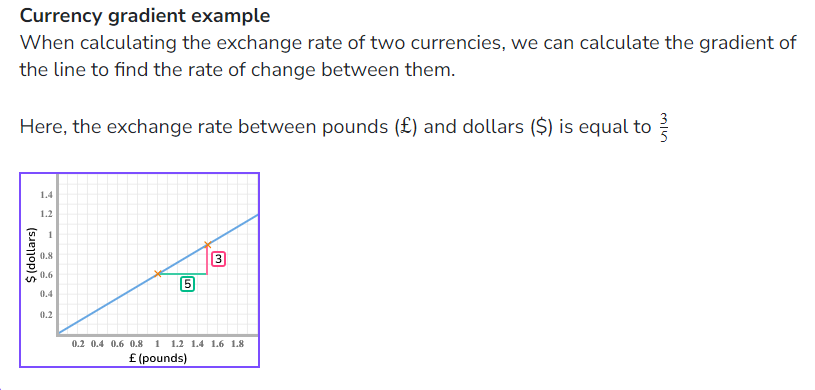

- Gradient descent is a method that updates our models parameters so that the gradient (rate of change) is equal to 0.

In [31]:
with torch.inference_mode():
    print(list(model.parameters()), "\n")

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 



In [32]:
# an epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

# Training
# 0. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. forward pass
    y_pred = model(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred, Y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform Backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. step the optimizer
    optimizer.step()

    # testing
    # turn off the gradient tracking
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss)
        print("Epoch: ", epoch, "Train loss: ", loss, "Test loss: ", test_loss)

Epoch:  0 Train loss:  tensor(0.3129, grad_fn=<MeanBackward0>) Test loss:  tensor(0.4811)
Epoch:  10 Train loss:  tensor(0.1977, grad_fn=<MeanBackward0>) Test loss:  tensor(0.3464)
Epoch:  20 Train loss:  tensor(0.0891, grad_fn=<MeanBackward0>) Test loss:  tensor(0.2173)
Epoch:  30 Train loss:  tensor(0.0531, grad_fn=<MeanBackward0>) Test loss:  tensor(0.1446)
Epoch:  40 Train loss:  tensor(0.0454, grad_fn=<MeanBackward0>) Test loss:  tensor(0.1136)
Epoch:  50 Train loss:  tensor(0.0417, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0992)
Epoch:  60 Train loss:  tensor(0.0382, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0889)
Epoch:  70 Train loss:  tensor(0.0348, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0806)
Epoch:  80 Train loss:  tensor(0.0313, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0723)
Epoch:  90 Train loss:  tensor(0.0279, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0647)
Epoch:  100 Train loss:  tensor(0.0245, grad_fn=<MeanBackward0>) Test loss:  tensor(0.0565)

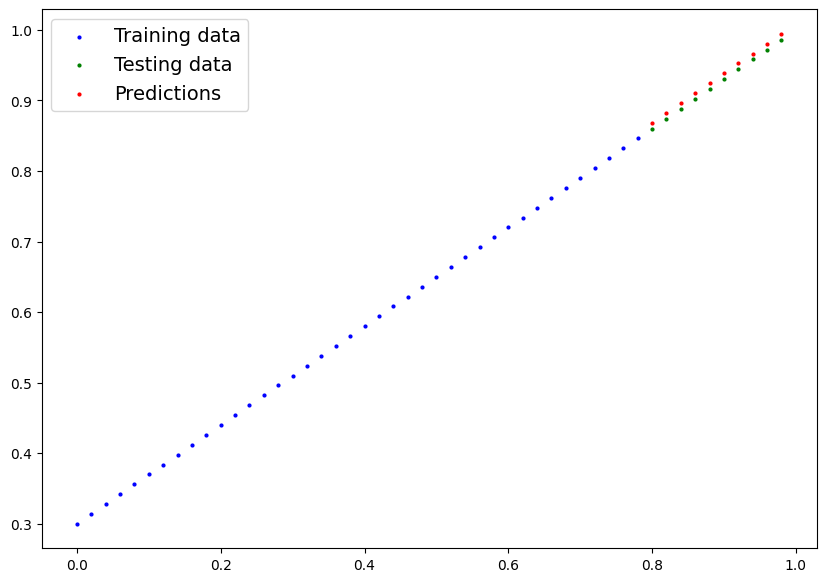

In [44]:
plot_predictions(predictions=y_preds)

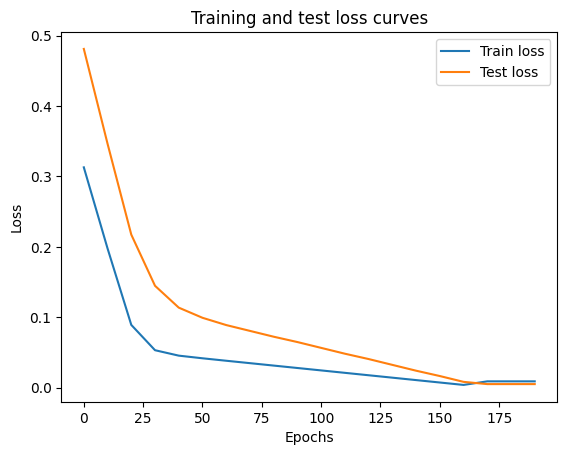

In [33]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [27]:
print("basically we're doing a function approximation here")
print("In a real world scenario, weights and bias are unknown")
print("It is the model's job to learn them\n")

# current parameters (weights and bias)
print(f"Current parameters (weights and bias): \n{model.state_dict()}\n")

# ideal parameters
print(f"Ideal parameters (weights and bias): \n {weight}, {bias}")

basically we're doing a function approximation here
In a real world scenario, weights and bias are unknown
It is the model's job to learn them

Current parameters (weights and bias): 
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

Ideal parameters (weights and bias): 
 0.7, 0.3


In [14]:
# import pandas as pd
# print(X_train.dtype)
# csv = pd.DataFrame(X_train.numpy(), dtype=pd.Float32Dtype)
# csv.to_csv("/home/arp/data.csv")

In [15]:
with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, Y_test)

print("Epoch: ", epoch, "Train loss: ", loss, "Test loss: ", test_loss)

Epoch:  0 Train loss:  tensor(0.3129, grad_fn=<MeanBackward0>) Test loss:  tensor(0.4811)


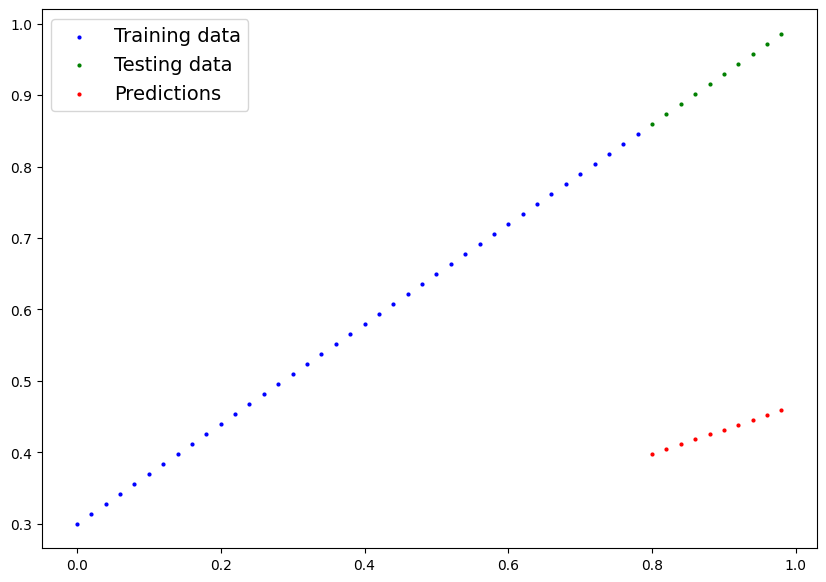

In [16]:
plot_predictions(predictions=y_preds)

### Saving a model in PyTorch

There are 3 ways to save and load a PyTorch model:
1. `torch.save()` - save a model in `pickle` format to disk
2. `torch.load()` - load a model from disk
3. `torch.nn.Module.load_state_dict()` - load a model's saved parameters dictionary `state_dict()` from disk

In [35]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
model_name = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / model_name

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [37]:
# 4. Load the model and evaluate the test accuracy
# Since the model is saved as a state dict, we can create a new instance and load the state dict
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [41]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [43]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])